In [102]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [103]:
def display(img_set, img_title, row = 1, col = 1):
    n = len(img_set)
    plt.figure(figsize=(10,6))
    for i in range(n):
        plt.subplot(row, col, i+1)
        plt.title(img_title[i])
        if len(img_set[i].shape) == 2:
            plt.imshow(img_set[i], cmap='gray')
        else:
            plt.imshow(img_set[i])
    plt.tight_layout()
    plt.show()
    plt.close()

Load Dataset

trainX.shape: (60000, 28, 28), trainY.shape: (60000,), testX.shape: (10000, 28, 28), testY.shape: (10000,))
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0


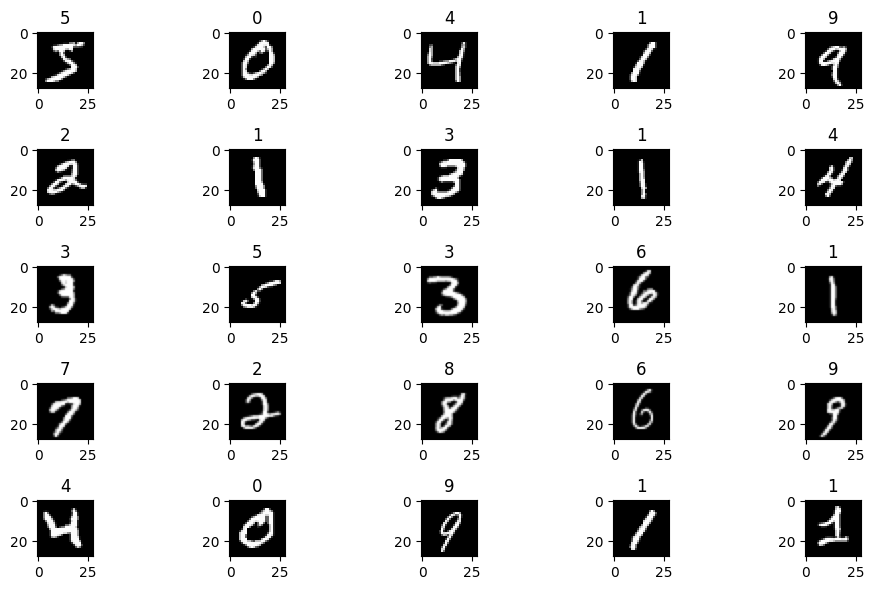

In [128]:
(trainX, trainY), (testX, testY) = load_data()
# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {})'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

display(trainX[:25],trainY[:25], 5, 5)

Prepare dataset

In [129]:
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)

# Investigate updated x
print('trainX.shape: {}, testX.shape: {})'.format(trainX.shape, testX.shape))
print('trainX.dtype: {}, testX.dtype: {}'.format(trainX.dtype, testX.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Turn y into one-hot-encoding, so that we can use 10 neurons in the output layer
trainY = to_categorical(trainY, num_classes=10)
testY = to_categorical(testY, num_classes=10)
# Investigate updated y
print('trainY.shape: {}, testY.shape: {})'.format(trainY.shape, testY.shape))
print('trainY.dtype: {}, testX.dtype: {}'.format(trainY.dtype, testY.dtype))

print(trainY[:5])

trainX.shape: (60000, 28, 28, 1), testX.shape: (10000, 28, 28, 1))
trainX.dtype: uint8, testX.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0
trainY.shape: (60000, 10), testY.shape: (10000, 10))
trainY.dtype: float64, testX.dtype: float64
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


FCNN

In [106]:
inputs = Input((28,28,1), name='Input Layer')
x = Flatten()(inputs)
x = Dense(2, activation='relu')(x)
x = Dense(4, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(4, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(4, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input Layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,960 (7.66 KB)

 Trainable params: 1,960 (7.66 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [107]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX,trainY,batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2201 - loss: 2.1127 - val_accuracy: 0.4305 - val_loss: 1.4562
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4343 - loss: 1.4043 - val_accuracy: 0.4907 - val_loss: 1.2138
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4838 - loss: 1.2452 - val_accuracy: 0.4967 - val_loss: 1.1942
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5040 - loss: 1.2045 - val_accuracy: 0.4922 - val_loss: 1.1853
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5133 - loss: 1.1872 - val_accuracy: 0.5218 - val_loss: 1.1449
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5313 - loss: 1.1733 - val_accuracy: 0.5603 - val_loss: 1.1276
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5459 - loss: 1.1426 - val_accuracy: 0.5480 - val_loss: 1.1181
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5526 - loss: 1.1389 - 

In [108]:
# Evaluate model performance
model.evaluate(testX, testY)

#predict Y
predictedY = model.predict(testX)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
    print(np.argmax(testY[i]), '\t\t', np.argmax(predictedY[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5584 - loss: 1.1815  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
OriginalY   PredictedY
=========   ==========
7 		 7
2 		 2
1 		 1
0 		 0
4 		 0
1 		 1
4 		 0
9 		 9
5 		 0
9 		 7


Fine tuning

In [109]:
inputs = Input((28,28,1), name='Input Layer')
x = Flatten()(inputs)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input Layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,890 (956.60 KB)

 Trainable params: 244,890 (956.60 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, batch_size=64, validation_split=0.1, epochs=10)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6425 - loss: 2.9212 - val_accuracy: 0.9390 - val_loss: 0.2370
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9263 - loss: 0.3176 - val_accuracy: 0.9512 - val_loss: 0.2425
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9520 - loss: 0.2176 - val_accuracy: 0.9630 - val_loss: 0.1642
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9617 - loss: 0.1701 - val_accuracy: 0.9450 - val_loss: 0.3006
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9636 - loss: 0.1650 - val_accuracy: 0.9723 - val_loss: 0.1401
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9688 - loss: 0.1381 - val_accuracy: 0.9700 - val_loss: 0.1685
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9709 - loss: 0.1349 - val_accuracy: 0.9692 - val_loss: 0.1722
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9713 - loss: 0.1336 - val_accuracy: 0.

In [111]:
#Evaluate
model.evaluate(testX, testY)

predictedY = model.predict(testX)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
    print(np.argmax(testY[i]), '\t\t', np.argmax(predictedY[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9601 - loss: 0.2444
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
OriginalY   PredictedY
=========   ==========
7 		 7
2 		 2
1 		 1
0 		 0
4 		 4
1 		 1
4 		 4
9 		 9
5 		 5
9 		 9


Data Augmentation

In [132]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [133]:
datagen = ImageDataGenerator (
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    fill_mode = 'nearest'
)

In [134]:
numberOfAugmentData = 10000

In [135]:
augmented_images = []
augmented_labels = []

for i in range(numberOfAugmentData):
    index = np.random.randint(0, len(trainX))

    image = trainX[index]
    label = trainY[index]

    image  = image.reshape(1, 28, 28, 1)

    augmented_image = next(datagen.flow(image, batch_size=1))[0]

    augmented_images.append(augmented_image)
    augmented_labels.append(label)
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

In [136]:
trainX = np.concatenate((trainX, augmented_images), axis=0)
trainY = np.concatenate((trainY, augmented_labels), axis=0)

print(trainX.shape)

(70000, 28, 28, 1)


In [137]:
inputs = Input((28,28,1), name='Input Layer')
x = Flatten()(inputs)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model2 = Model(inputs, outputs)
model2.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input Layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,890 (956.60 KB)

 Trainable params: 244,890 (956.60 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(trainX, trainY, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1967 - loss: 2.5374 - val_accuracy: 0.1637 - val_loss: 2.2103
Epoch 2/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2180 - loss: 1.9965 - val_accuracy: 0.3273 - val_loss: 2.4062
Epoch 3/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5538 - loss: 1.1716 - val_accuracy: 0.5894 - val_loss: 1.6205
Epoch 4/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8461 - loss: 0.4703 - val_accuracy: 0.7059 - val_loss: 1.8896
Epoch 5/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9269 - loss: 0.3206 - val_accuracy: 0.7177 - val_loss: 1.1854
Epoch 6/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9321 - loss: 0.2971 - val_accuracy: 0.7319 - val_loss: 1.3599
Epoch 7/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9293 - loss: 0.3361 - val_accuracy: 0.6736 - val_loss: 1.4339
Epoch 8/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9329 - loss: 0.3157 - 

In [140]:
model2.evaluate(testX,testY)
predictedY = model2.predict(testX)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
    print(np.argmax(testY[i]), '\t\t', np.argmax(predictedY[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9073 - loss: 0.3822
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
OriginalY   PredictedY
=========   ==========
7 		 7
2 		 2
1 		 1
0 		 0
4 		 4
1 		 1
4 		 4
9 		 9
5 		 3
9 		 9
